In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
from sklearn.pipeline import Pipeline
 # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin 
# To create a box-cox transformation class
from collections import Counter

In [10]:
ci_df = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
ci_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [11]:
ci_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
ci_df.describe()


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
ci_df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [21]:
# Checking the counts of label categories
Income = ci_df['Income'].value_counts(normalize=True)
round(Income * 100, 2).astype('str') + ' %'

 <=50K    75.92 %
 >50K     24.08 %
Name: Income, dtype: object

Observations:

The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.

# Step 2: Exploratory Data Analysis


2.1: Univariate Analysis


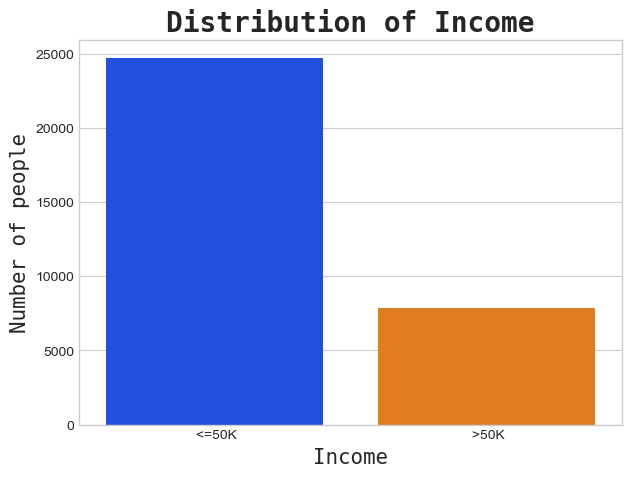

In [23]:
# Creating a barplot for 'Income'
Income = ci_df['Income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(Income.index, Income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

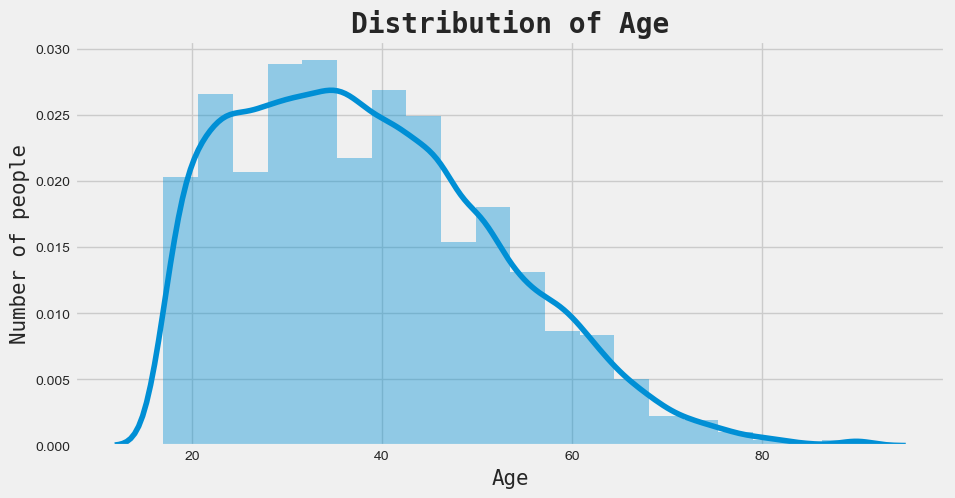

In [25]:
# Creating a distribution plot for 'Age'
Age = ci_df['Age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(ci_df['Age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

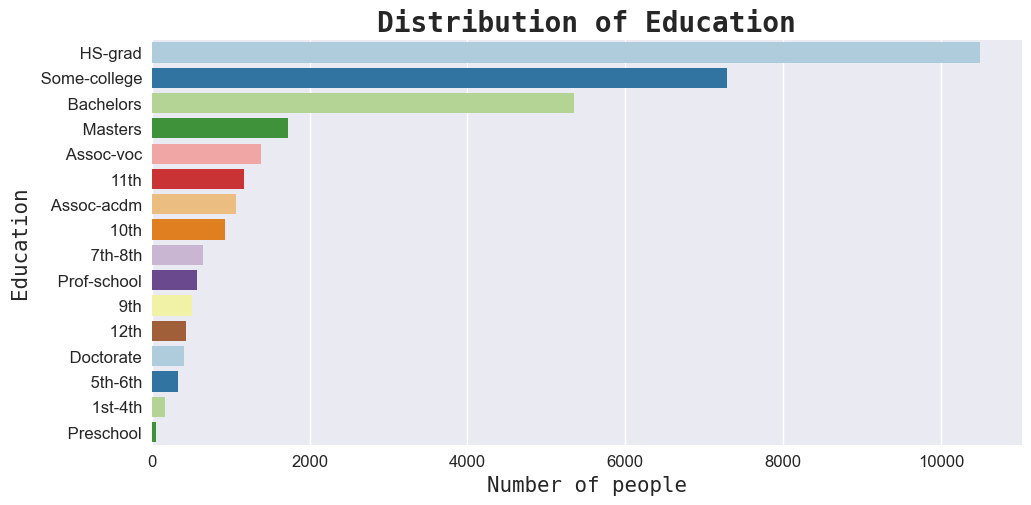

In [26]:
# Creating a barplot for 'Education'
edu = ci_df['Education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

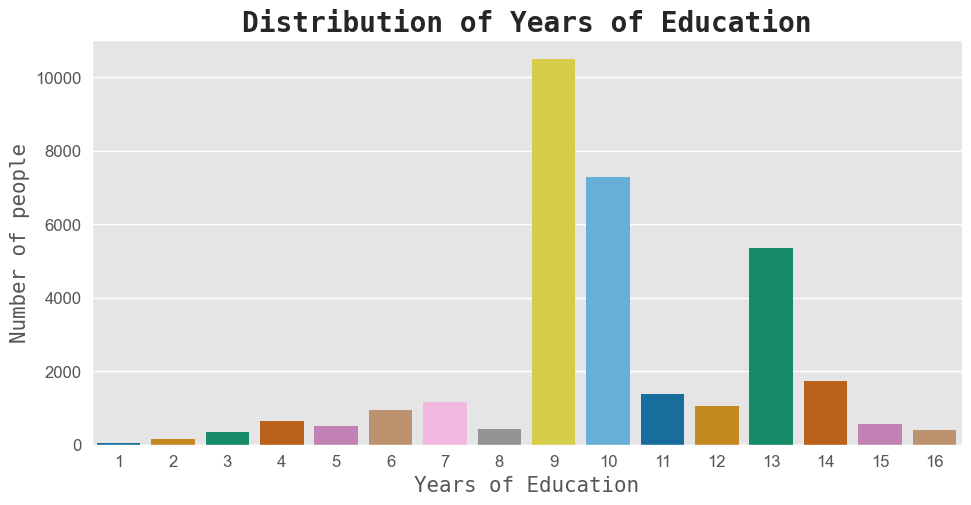

In [28]:
# Creating a barplot for 'Years of Education'
edu_num = ci_df['Education_num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

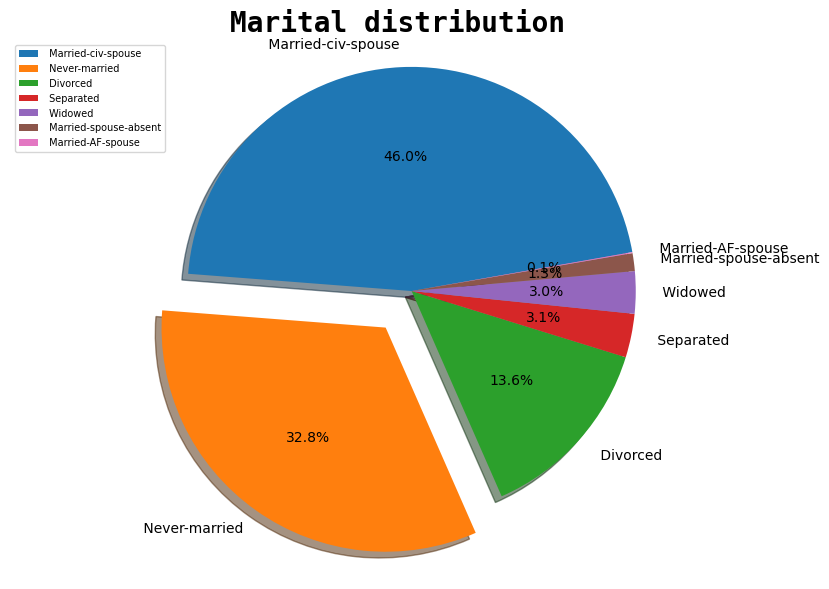

In [29]:
# Creating a pie chart for 'Marital status'
marital = ci_df['Marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

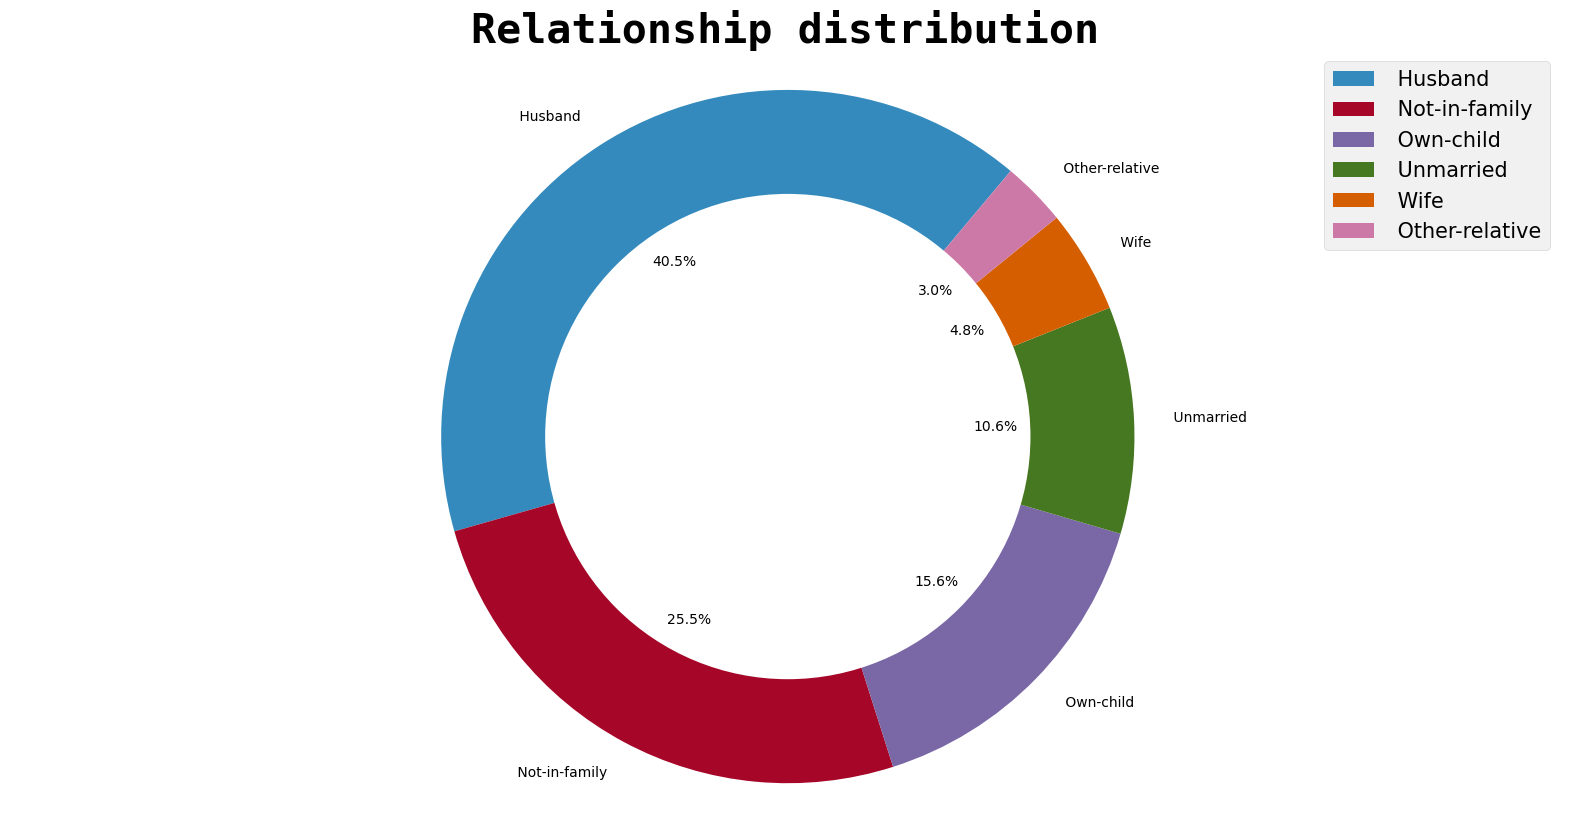

In [30]:
# Creating a donut chart for 'Age'
relation = ci_df['Relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

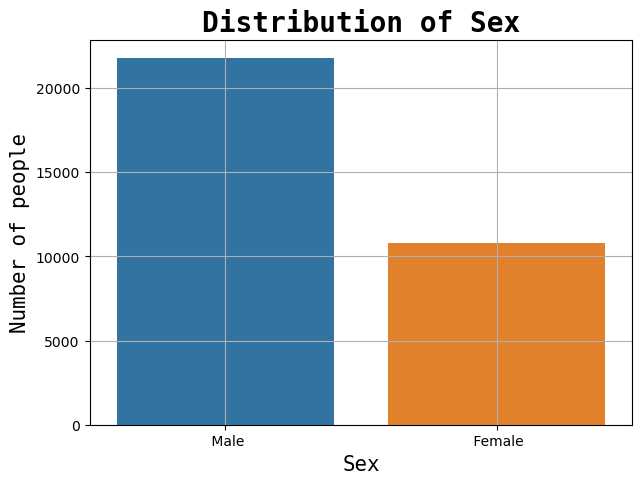

In [31]:
# Creating a barplot for 'Sex'
sex = ci_df['Sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

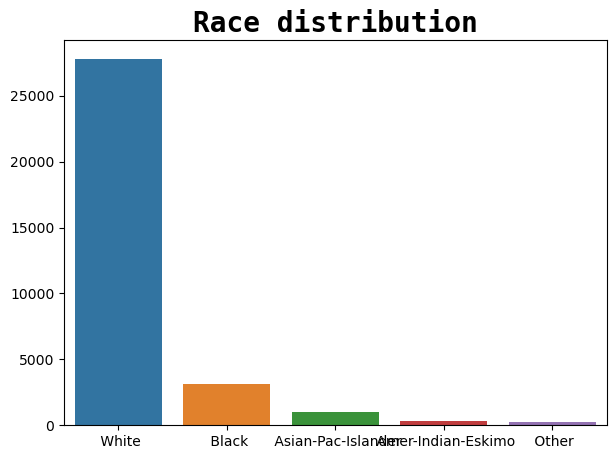

In [37]:
# Creating a Treemap for 'Race'

race = ci_df['Race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(x=race.index, y=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

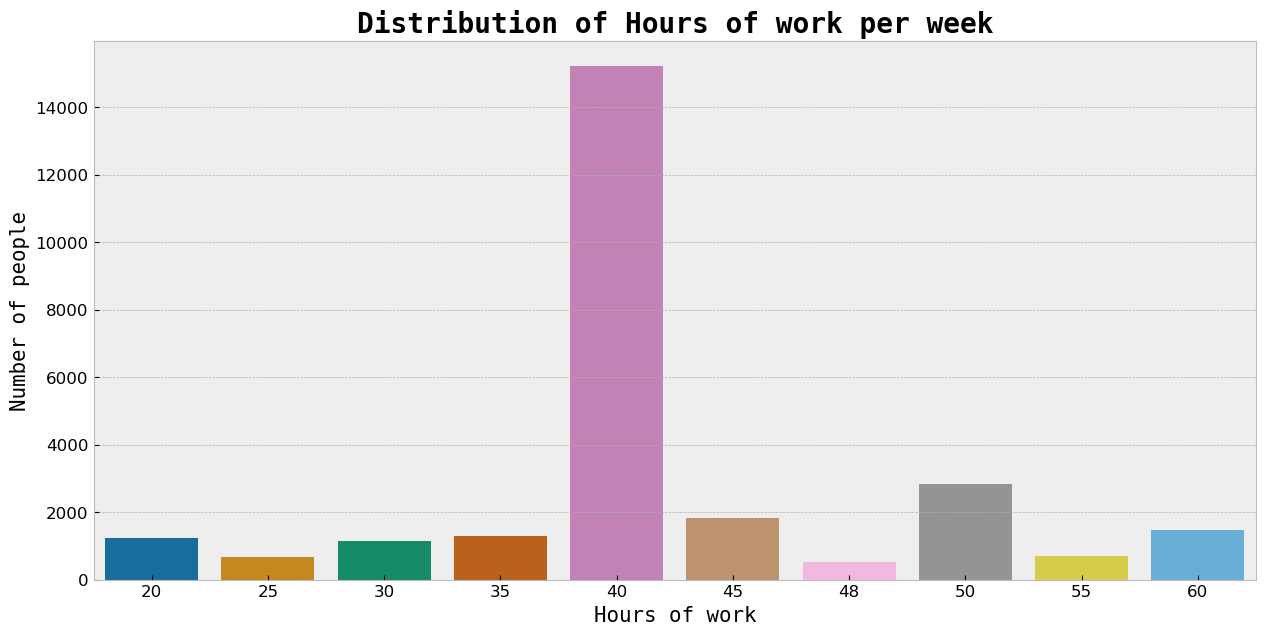

In [38]:
# Creating a barplot for 'Hours per week'
hours = ci_df['Hours_per_week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

2.2 Bivariate Analysis


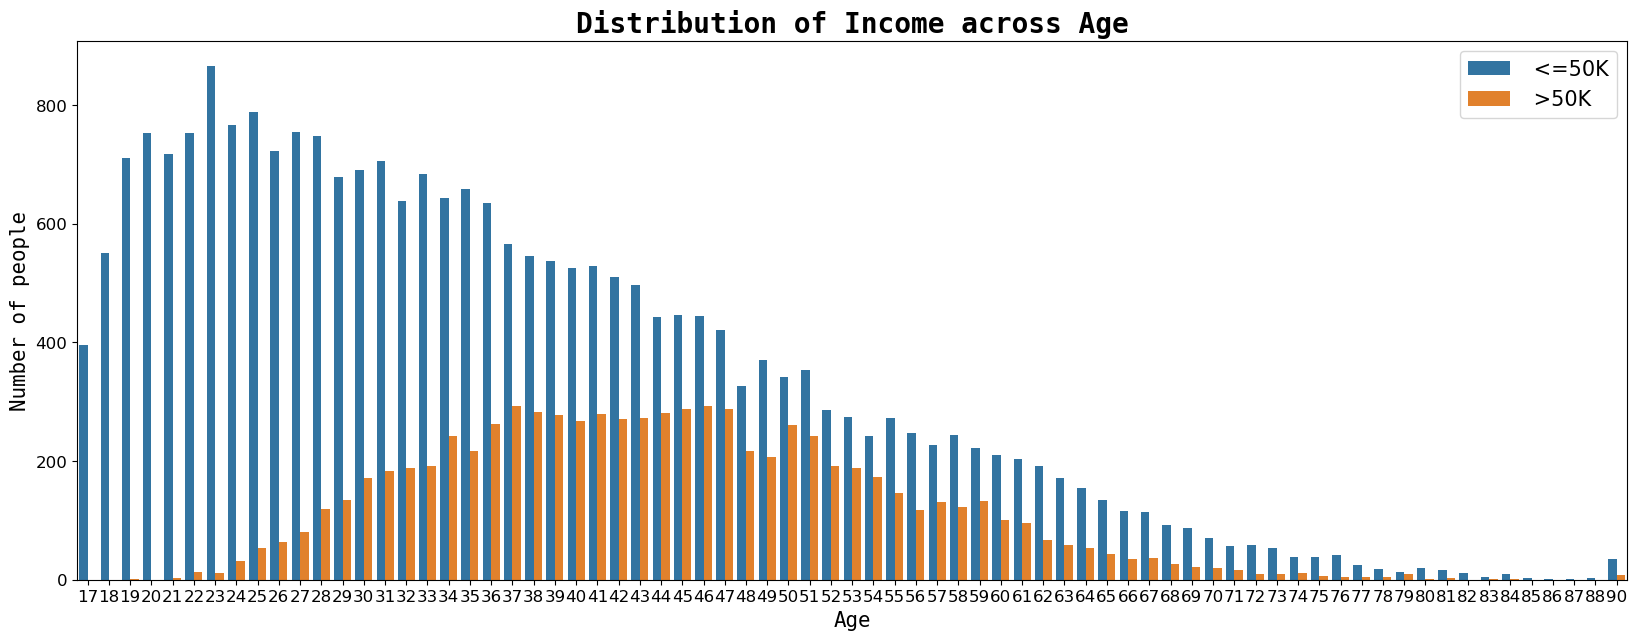

In [39]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(ci_df['Age'], hue=ci_df['Income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


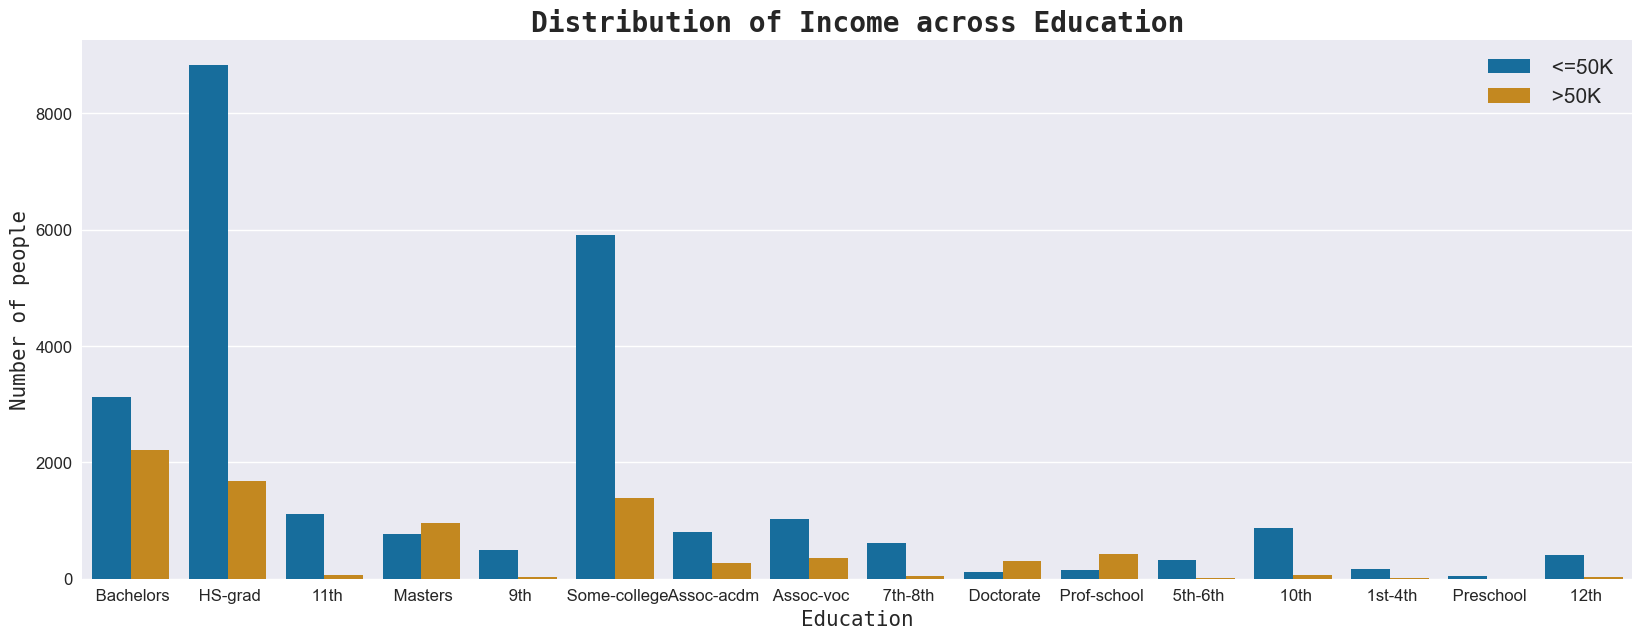

In [40]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(ci_df['Education'],
              hue=ci_df['Income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

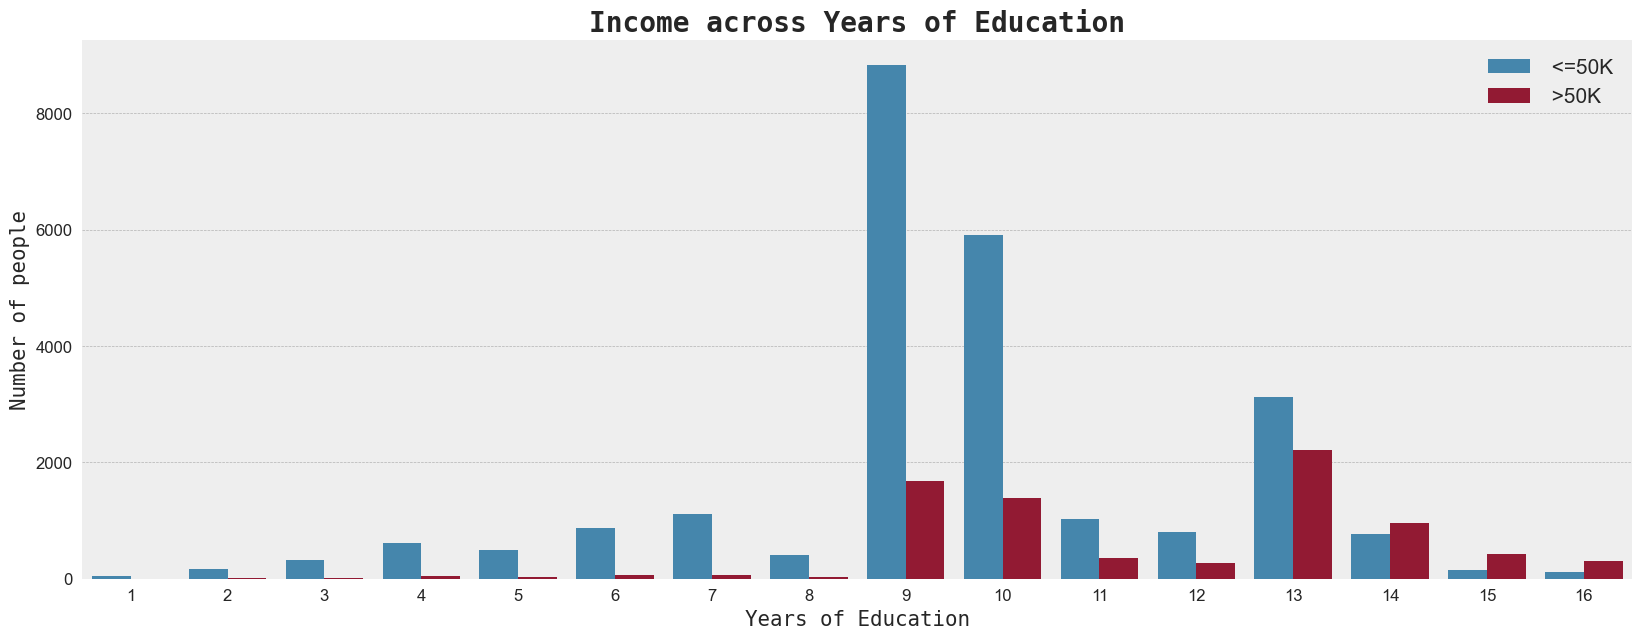

In [41]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(ci_df['Education_num'],
              hue=ci_df['Income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

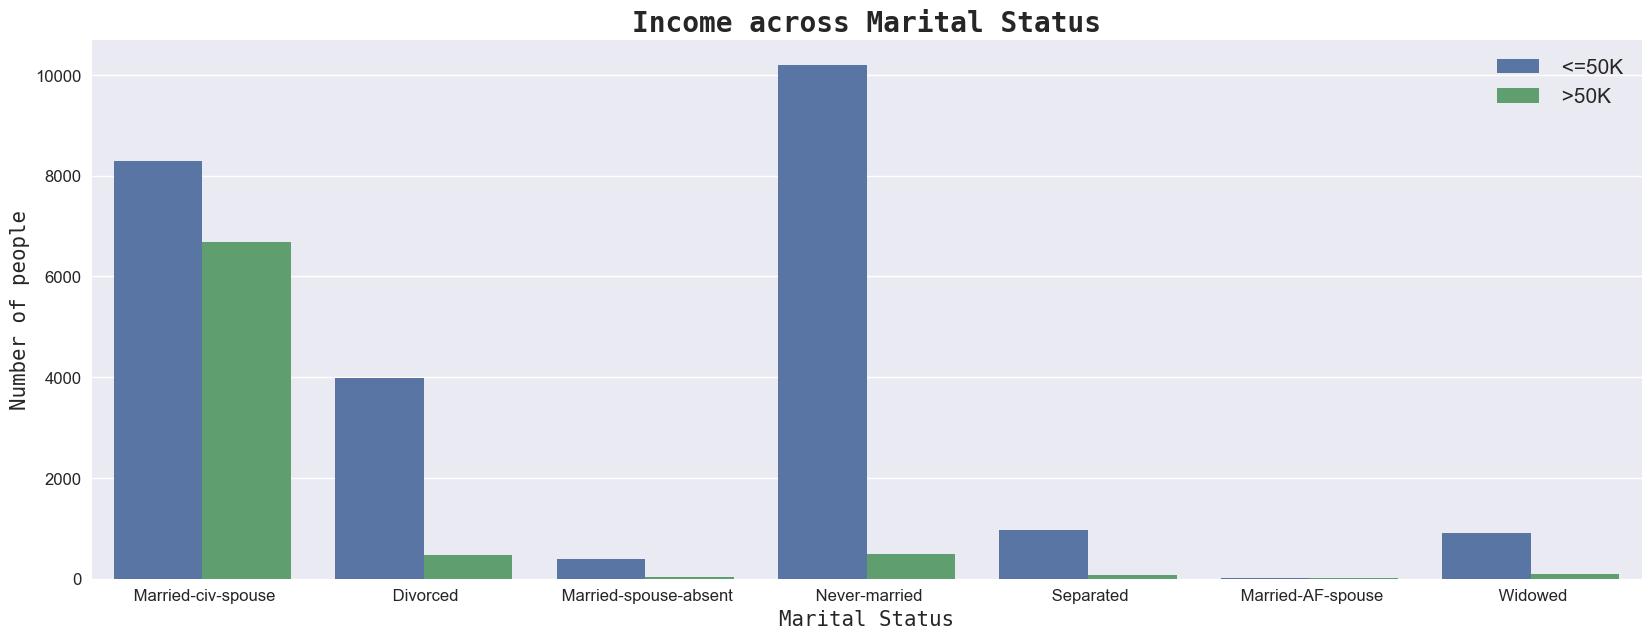

In [42]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(ci_df['Marital_status'], hue=ci_df['Income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

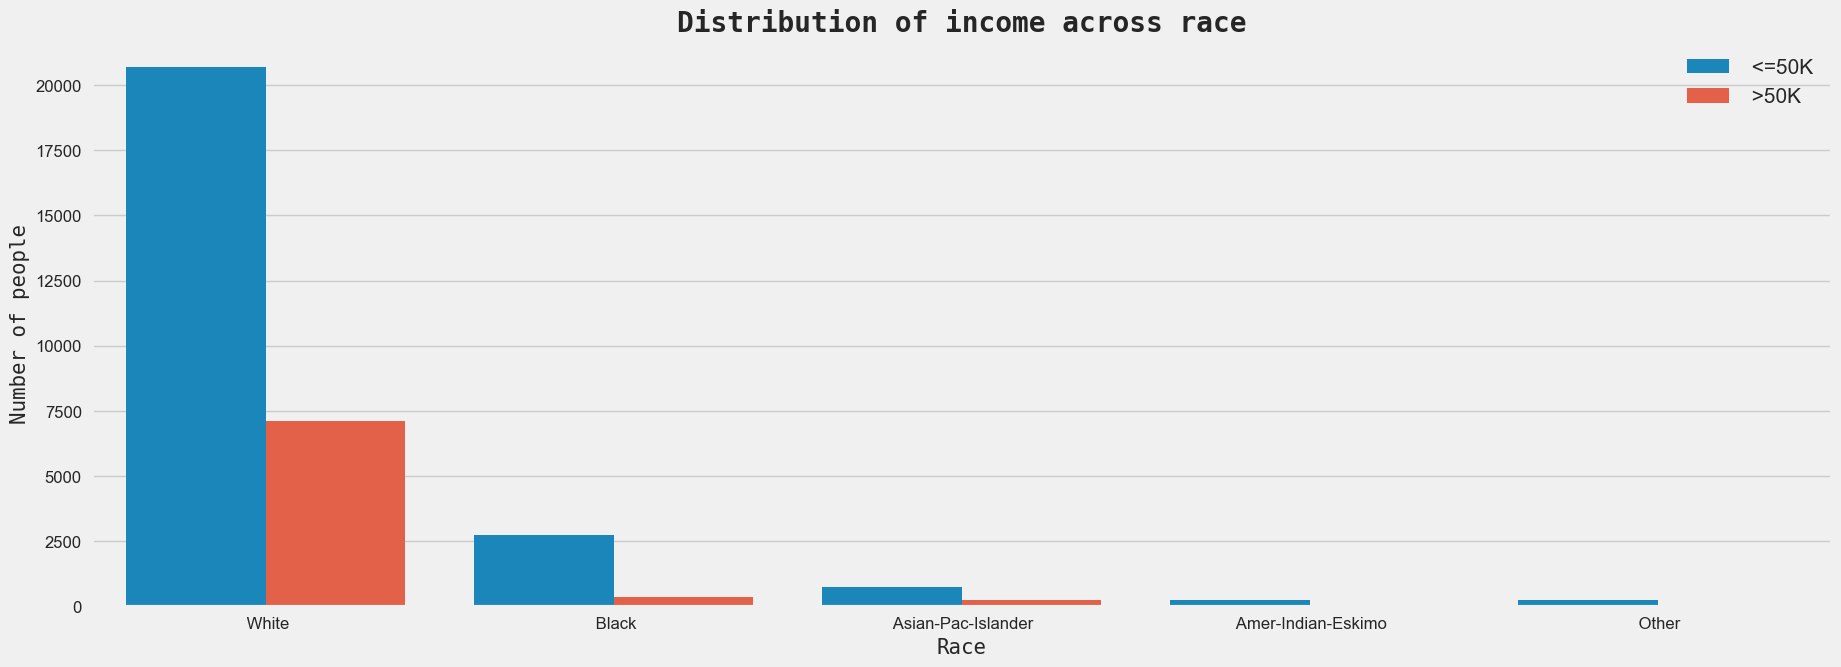

In [43]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(ci_df['Race'], hue=ci_df['Income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

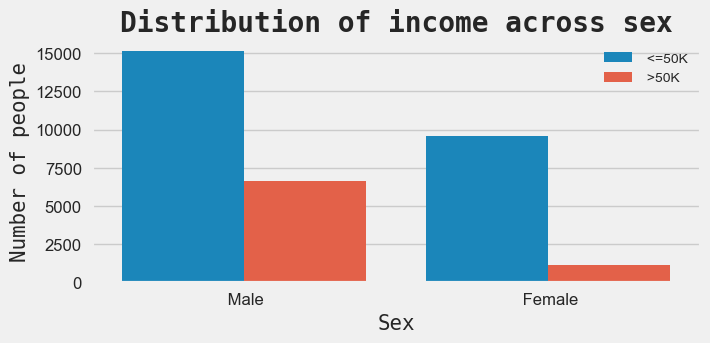

In [44]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(ci_df['Sex'], hue=ci_df['Income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()


2.3: Multivariate Analysis


In [46]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ci_df['Income'] = le.fit_transform(ci_df['Income'])


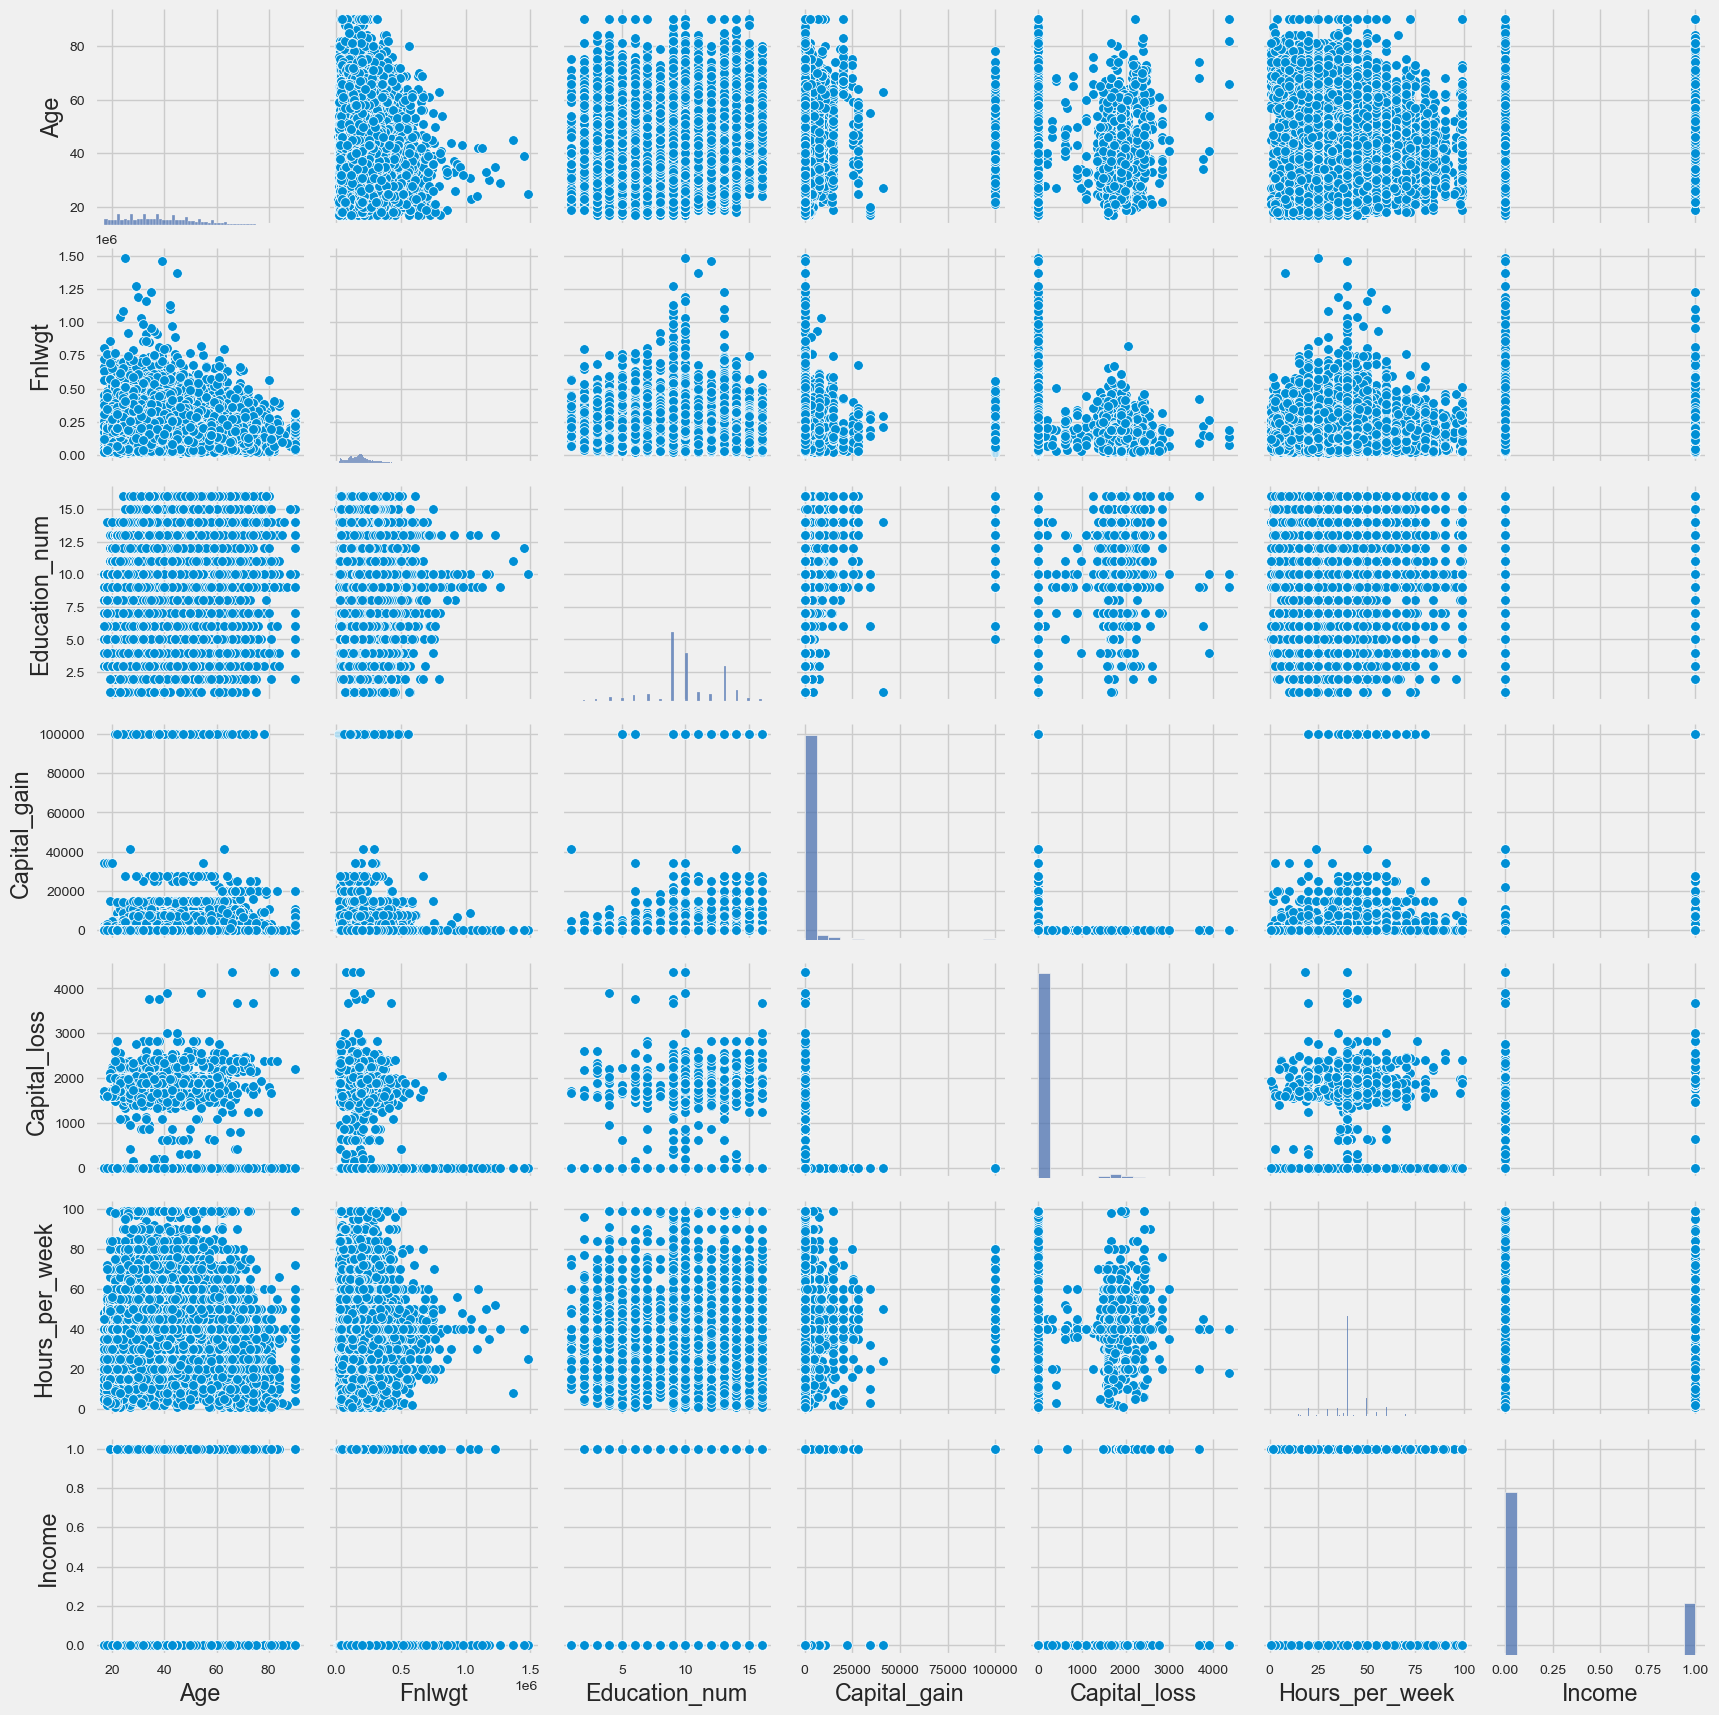

In [49]:
# Creating a pairplot of dataset
sns.pairplot(ci_df)
plt.savefig('multi1.png')
plt.show()

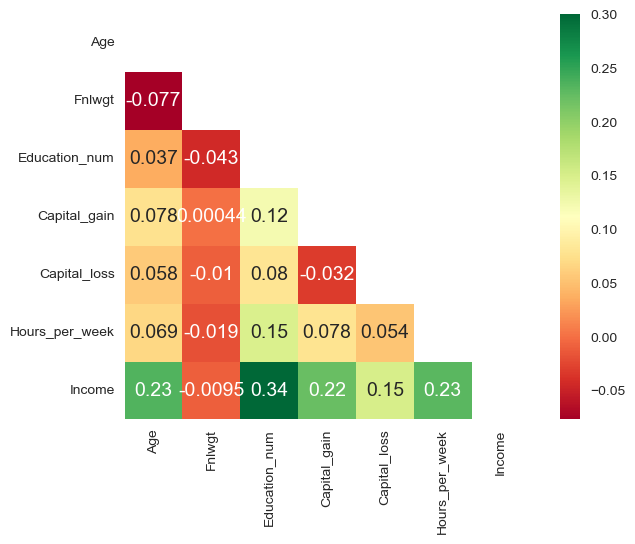

In [50]:
corr = ci_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

Observations:
In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.

From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.

# Step 3: Data Preprocessing


3.1: Label Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

for col in ci_df.columns:
    if ci_df[col].dtypes == 'object':
        encoder = LabelEncoder()
        ci_df[col] = encoder.fit_transform(ci_df[col])


3.2: Feature Selection

In [53]:
X = ci_df.drop('Income', axis=1)
Y = ci_df['Income']

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)


In [55]:
selector.fit(X, Y)


ExtraTreesClassifier(random_state=42)

In [56]:
feature_imp = selector.feature_importances_


In [57]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))


0 15.36
1 4.45
2 16.52
3 3.56
4 8.98
5 7.33
6 7.48
7 9.46
8 1.45
9 2.7
10 8.84
11 2.77
12 9.36
13 1.74


In [58]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [60]:
X = X.drop(['Workclass', 'Education', 'Race', 'Sex',
            'Capital_loss', 'Native_country'], axis=1)

3.3: Feature Scaling


In [61]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

3.4: Fixing imbalanced dataset using Oversampling


In [62]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'


0    75.92 %
1    24.08 %
Name: Income, dtype: object

In [64]:
pip install imbalanced-learn


     -------------------------------------- 235.6/235.6 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [65]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)


In [66]:
ros.fit(X, Y)


RandomOverSampler(random_state=42)

In [67]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)


In [68]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'


0    50.0 %
1    50.0 %
Name: Income, dtype: object

3.5: Creating a train test split


In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Step 4: Data Modelling


4.1: Logistic Regression


In [70]:
lr = LogisticRegression(random_state=42)


In [71]:
lr.fit(X_train, Y_train)


LogisticRegression(random_state=42)

In [73]:
y_pred = lr.predict(X_test)


In [74]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.7605177993527508


In [81]:
print("Training Accuracy : {}%".format(lr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(lr.score(X_test, Y_test) * 100))


Training Accuracy : 75.54235145385589%
Testing Accuracy  : 76.05177993527508%


4.2: KNN Classifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


In [76]:
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [78]:
y_pred_1 = knn.predict(X_test)


In [79]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_1))


Accuracy: 0.8360639158576052


In [80]:
print("Training Accuracy : {}%".format(knn.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(knn.score(X_test, Y_test) * 100))

Training Accuracy : 88.91782553729456%
Testing Accuracy  : 83.60639158576052%


4.3: Support Vector Classifier


In [82]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [83]:
svc.fit(X_train, Y_train)


SVC(random_state=42)

In [85]:
Y_pred_2 = svc.predict(X_test)


In [87]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_2))


Accuracy: 0.8198826860841424


In [88]:
print("Training Accuracy : {}%".format(svc.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(svc.score(X_test, Y_test) * 100))

Training Accuracy : 82.01264222503161%
Testing Accuracy  : 81.98826860841424%


4.4: Decision Tree Classifier


In [89]:
dc = DecisionTreeClassifier(random_state=42)


In [90]:
dc.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=42)

In [91]:
y_pred_3 = dc.predict(X_test)


In [92]:
print("Training Accuracy : {}%".format(dc.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(dc.score(X_test, Y_test) * 100))

Training Accuracy : 100.0%
Testing Accuracy  : 91.28236245954693%


4.5: Random Forest Classifier


In [93]:
rfc = RandomForestClassifier(random_state=42)


In [94]:
rfc.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [97]:
y_pred_4 = rfc.predict(X_test)


In [99]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_4))


Accuracy: 0.9256674757281553


In [100]:
print("Training Accuracy : {}%".format(rfc.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(rfc.score(X_test, Y_test) * 100))

Training Accuracy : 99.99747155499368%
Testing Accuracy  : 92.56674757281553%


4.6: XGB Classifier


In [101]:
from xgboost import XGBClassifier
xgb = XGBClassifier()


In [102]:
xgb.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [103]:
y_pred_5 = xgb.predict(X_test)


In [104]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_5))


Accuracy: 0.861549352750809


In [105]:
print("Training Accuracy : {}%".format(xgb.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(xgb.score(X_test, Y_test) * 100))

Training Accuracy : 88.94563843236409%
Testing Accuracy  : 86.1549352750809%


# Step 5: Model Evaluation


In [106]:
from sklearn.metrics import f1_score


In [131]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, y_pred) * 100, 2))
print('F1 score:', round(f1_score(Y_test, y_pred) * 100, 2))


Logistic Regression:
Accuracy score: 76.05
F1 score: 76.07


In [108]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, y_pred_1) * 100, 2))
print('F1 score:', round(f1_score(Y_test, y_pred_1) * 100, 2))

KNN Classifier:
Accuracy score: 83.61
F1 score: 84.63


In [109]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_2) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_2) * 100, 2))

Support Vector Classifier:
Accuracy score: 81.99
F1 score: 83.09


In [110]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, y_pred_3) * 100, 2))
print('F1 score:', round(f1_score(Y_test, y_pred_3) * 100, 2))

Decision Tree Classifier:
Accuracy score: 91.28
F1 score: 91.75


In [112]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, y_pred_4) * 100, 2))
print('F1 score:', round(f1_score(Y_test, y_pred_4) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.57
F1 score: 92.93


In [113]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, y_pred_5) * 100, 2))
print('F1 score:', round(f1_score(Y_test, y_pred_5) * 100, 2))

XGB Classifier:
Accuracy score: 86.15
F1 score: 86.73


# Step 6: Hyperparameter Tuning


In [114]:
from sklearn.model_selection import RandomizedSearchCV


In [115]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]


In [116]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [117]:
rfc_tuned = RandomForestClassifier(random_state=42)


In [120]:
rfc_cv = RandomizedSearchCV(
    estimator=rfc_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [121]:
rfc_cv.fit(X_train, Y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [123]:
rfc_cv.best_score_


0.9123135271807838

In [124]:
rfc_cv.best_params_


{'n_estimators': 134, 'max_depth': 142}

In [127]:
rfc_best = RandomForestClassifier(
    max_depth=142, n_estimators=134, random_state=42)

In [128]:
rfc_best.fit(X_train, Y_train)


RandomForestClassifier(max_depth=142, n_estimators=134, random_state=42)

In [129]:
Y_pred_rfc_best = rfc_best.predict(X_test)


In [130]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rfc_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rfc_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.61
F1 score: 92.97


Conclusion:
In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier.

A hyperparameter tuned random forest classifier gives the highest accuracy score of 92.61 and f1 score of 92.97.